In [1]:
#Set up required libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 
import openpyxl 

## Project Steps
### Step (i): Data Visualization and Checks

The project begins by loading the provided data from an Excel file (Junior Data Analyst _ Data.xlsx) into a pandas DataFrame.

The data contains information about solar electricity generation, electricity usage, and other relevant parameters. 

The goal of this step is to visualize and compare the average solar electricity generation and electricity usage for each hour in a day.


In [2]:
#Importing Data and display first 10 rows
electricity_df=pd.read_excel ('Junior Data Analyst _ Data.xlsx',
                              engine='openpyxl',
                              sheet_name='Raw Data',
                              skiprows=range(2))
electricity_df.head(10)

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh)
0,0,2020-01-01 00:00:00,0.000,1.509849
1,1,2020-01-01 01:00:00,0.000,1.411859
2,2,2020-01-01 02:00:00,0.000,1.023898
3,3,2020-01-01 03:00:00,0.000,0.642000
4,4,2020-01-01 04:00:00,0.000,0.960000
5,5,2020-01-01 05:00:00,0.012,0.897000
6,6,2020-01-01 06:00:00,0.006,0.648000
7,7,2020-01-01 07:00:00,0.009,0.774000
8,8,2020-01-01 08:00:00,0.012,1.299000
9,9,2020-01-01 09:00:00,0.846,0.606000


In [6]:
#Checking shape of the data to make sure all data is available 
electricity_df.shape

(8760, 4)

In [3]:
#Step 3: Learning more about the dataset
electricity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 4 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Hour                                8760 non-null   int64         
 1   Date/hour start                     8760 non-null   datetime64[ns]
 2   Solar electricity generation (kWh)  8760 non-null   float64       
 3   Electricity usage (kWh)             8760 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 273.9 KB


In [4]:
#Look for empty rows
electricity_df.tail()

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh)
8755,19,2020-12-31 19:00:00,0.012,4.395600
8756,20,2020-12-31 20:00:00,0.003,4.560600
8757,21,2020-12-31 21:00:00,0.000,2.022000
8758,22,2020-12-31 22:00:00,0.015,1.668000
8759,23,2020-12-31 23:00:00,0.000,0.805919


In [5]:
#check for null values
null_count=electricity_df.isnull().sum()
null_count

Hour                                  0
Date/hour start                       0
Solar electricity generation (kWh)    0
Electricity usage (kWh)               0
dtype: int64

In [7]:
#Performing some descritive analysis
electricity_df.describe()

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh)
count,8760.000000,8760,8760.000000,8760.000000
mean,11.500000,2020-07-02 07:37:13.972602624,1.116750,7.312704
min,0.000000,2020-01-01 00:00:00,0.000000,-12.624000
25%,5.750000,2020-04-02 05:45:00,0.000000,0.300000
50%,11.500000,2020-07-02 11:30:00,0.024000,0.621000
75%,17.250000,2020-10-01 17:15:00,1.272750,1.686000
max,23.000000,2020-12-31 23:00:00,13.050000,46000.000000
std,6.922582,NaN,2.026098,491.479806


In [8]:
#Check columns for the data
electricity_df.columns

Index(['Hour', 'Date/hour start', 'Solar electricity generation (kWh)',
       'Electricity usage (kWh)'],
      dtype='object')

In [9]:
#I would change the headers to make it more convient since there is a lot of spaces btwn the titles.
electricity_df.rename (columns = {'Hour':'hour',
                                  'Date/hour start':'date_hour_start',
                                  'Solar electricity generation (kWh)':'solar_kwh',
                                  'Electricity usage (kWh)':'electric_use_kwh'}, inplace = True)
electricity_df.head()

,hour,date_hour_start,solar_kwh,electric_use_kwh
0,0,2020-01-01 00:00:00,0.0,1.509849
1,1,2020-01-01 01:00:00,0.0,1.411859
2,2,2020-01-01 02:00:00,0.0,1.023898
3,3,2020-01-01 03:00:00,0.0,0.642000
4,4,2020-01-01 04:00:00,0.0,0.960000


In [10]:
#We will visualize some data in order to have a good picture of what data we are dealing with.
#In this we will use the average electricity usage and the average solar electricity generated
hourly_avg = electricity_df.groupby('hour')[['solar_kwh','electric_use_kwh']].mean()
print(hourly_avg)

      solar_kwh  electric_use_kwh
hour                             
0      0.000000          0.816471
1      0.035753          0.401552
2      0.000000          0.250623
3      0.000000          0.407688
4      0.078559          0.552038
5      0.270625          0.610852
6      0.722868          2.084071
7      1.394885          1.788123
8      2.206044          1.798899
9      2.941512          1.681553
10     3.504041          1.807175
11     3.751915          1.685425
12     3.495879        128.000444
13     3.012649          1.512797
14     2.380767          1.249093
15     1.609068          1.356370
16     0.790964          1.566312
17     0.366649          2.495499
18     0.160652          6.140079
19     0.047186          6.055943
20     0.012912          4.843858
21     0.008934          2.732926
22     0.010126          4.569542
23     0.000000          1.097558


<Axes: xlabel='hour'>

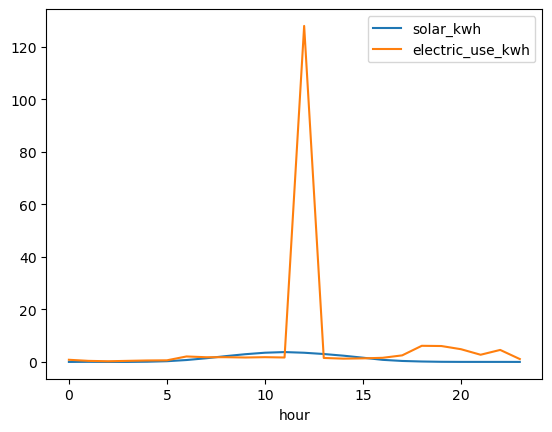

In [11]:
hourly_avg.plot(kind='line')

<Axes: ylabel='electric_use_kwh'>

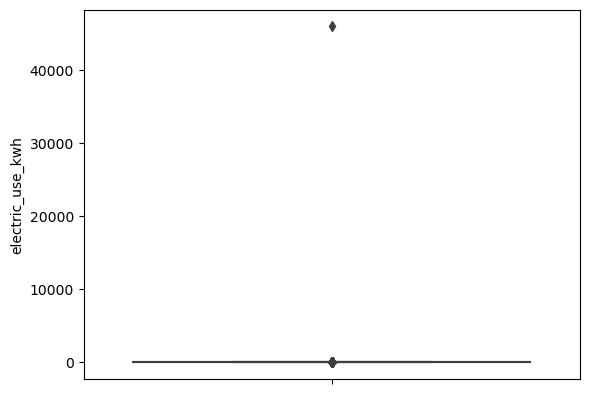

In [12]:
#checking outliers for Electric use
sns.boxplot(y='electric_use_kwh', data=electricity_df)

<Axes: ylabel='solar_kwh'>

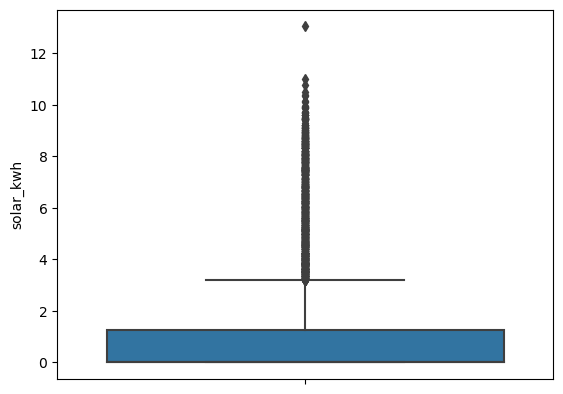

In [13]:
#checking outliers for solar gen
sns.boxplot(y='solar_kwh', data=electricity_df)

<Axes: ylabel='electric_use_kwh'>

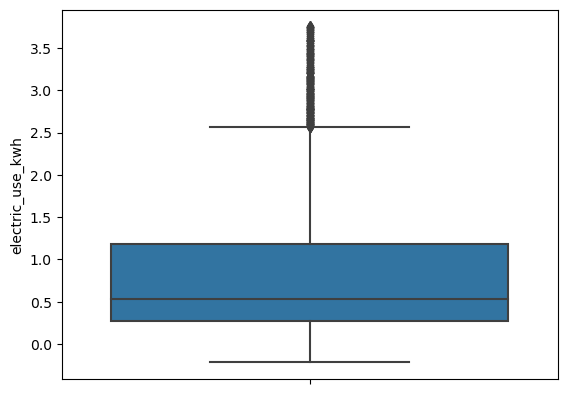

In [14]:
# Lower Quartile
Q1 = electricity_df["electric_use_kwh"].quantile(0.25)

# Upper quartile
Q3 = electricity_df["electric_use_kwh"].quantile(0.75)

# Interquartile Range
IQR = Q3 - Q1

lower_boundary = Q1 - IQR * 1.5 

upper_boundary = Q3 + IQR * 1.5 

# IRemoving outliers 
electricity_df = electricity_df[~((electricity_df["electric_use_kwh"] < lower_boundary) | (electricity_df["electric_use_kwh"] > upper_boundary))] 

sns.boxplot(data=electricity_df, y="electric_use_kwh")

<Axes: ylabel='solar_kwh'>

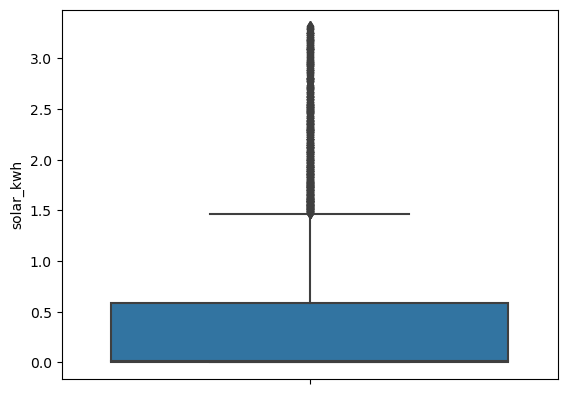

In [15]:
# Lower Quartile
Q1 = electricity_df["solar_kwh"].quantile(0.25)

# Upper quartile
Q3 = electricity_df["solar_kwh"].quantile(0.75)

# Interquartile Range
IQR = Q3 - Q1

lower_boundary = Q1 - IQR * 1.5 

upper_boundary = Q3 + IQR * 1.5 

# IRemoving outliers 
electricity_df = electricity_df[~((electricity_df["solar_kwh"] < lower_boundary) | (electricity_df["solar_kwh"] > upper_boundary))] 

sns.boxplot(data=electricity_df, y="solar_kwh")

In [18]:
hourly_avg2 = electricity_df.groupby('hour')[['solar_kwh','electric_use_kwh']].mean()
print(hourly_avg2)

      solar_kwh  electric_use_kwh
hour                             
0      0.000000          0.711209
1      0.000000          0.390031
2      0.000000          0.250623
3      0.000000          0.407688
4      0.078975          0.457097
5      0.248263          0.488073
6      0.445455          0.610916
7      0.765287          0.982279
8      1.118319          0.937929
9      1.403888          0.747753
10     1.410156          0.724188
11     1.362714          0.777195
12     1.362017          0.751227
13     1.217078          0.780746
14     1.231736          0.806839
15     1.057494          0.777955
16     0.780232          0.877356
17     0.376895          1.071368
18     0.197517          2.048769
19     0.055565          2.249309
20     0.013733          2.449495
21     0.008919          1.557162
22     0.010202          1.497899
23     0.000000          0.974609


<Axes: xlabel='hour'>

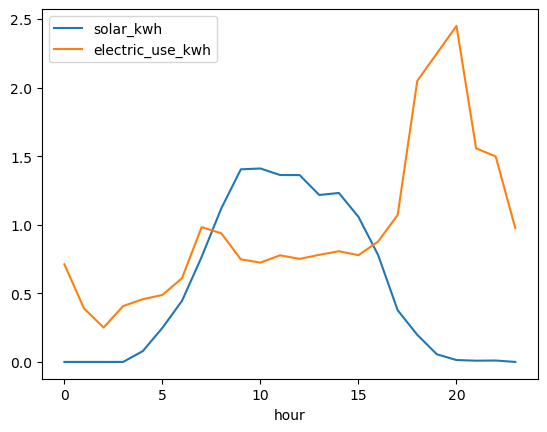

In [19]:
hourly_avg2.plot(kind='line')

In [25]:
electricity_df.shape

(6767, 5)

In [27]:
electricity_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6767 entries, 0 to 8759
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   hour              6767 non-null   int64         
 1   date_hour_start   6767 non-null   datetime64[ns]
 2   solar_kwh         6767 non-null   float64       
 3   electric_use_kwh  6767 non-null   float64       
 4   elec_to_buy_kwh   6767 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 317.2 KB


### Step (ii): Calculating Electricity Bought

In this step, the project calculates the electricity needed to be bought from the provider by subtracting the solar electricity generation from the electricity usage. 
The numpy library is used to efficiently perform element-wise subtraction and limit the result to non-negative values.


In [21]:
#Step(ii):Calculating Electricity Bought

electricity_df['elec_to_buy_kwh']= electricity_df['electric_use_kwh']-electricity_df['solar_kwh']
electricity_df.loc[electricity_df['elec_to_buy_kwh'] <0, 'elec_to_buy_kwh']=0

In [22]:
electricity_df.head(10)

,hour,date_hour_start,solar_kwh,electric_use_kwh,elec_to_buy_kwh
0,0,2020-01-01 00:00:00,0.000,1.509849,1.509849
1,1,2020-01-01 01:00:00,0.000,1.411859,1.411859
2,2,2020-01-01 02:00:00,0.000,1.023898,1.023898
3,3,2020-01-01 03:00:00,0.000,0.642000,0.642000
4,4,2020-01-01 04:00:00,0.000,0.960000,0.960000
5,5,2020-01-01 05:00:00,0.012,0.897000,0.885000
6,6,2020-01-01 06:00:00,0.006,0.648000,0.642000
7,7,2020-01-01 07:00:00,0.009,0.774000,0.765000
8,8,2020-01-01 08:00:00,0.012,1.299000,1.287000
9,9,2020-01-01 09:00:00,0.846,0.606000,0.000000


In [28]:
electricity_df['elec_to_buy_kwh'].min(), electricity_df['elec_to_buy_kwh'].max()

(0.0, 3.7554)

### Step (iii): Calculating Excess Solar Generation
The excess solar electricity generated is calculated by subtracting the electricity usage from the solar electricity generation. Similar to Step (ii), numpy is used to perform element-wise subtraction and limit the result to non-negative values.


In [37]:
#Step(iii): Calculating Excess Solar Generation

electricity_df['solar_excess_kwh']= np.maximum(0, electricity_df['solar_kwh']-electricity_df['electric_use_kwh'])


In [39]:
electricity_df.head(20)

,hour,date_hour_start,solar_kwh,electric_use_kwh,elec_to_buy_kwh,solar_excess_kwh
0,0,2020-01-01 00:00:00,0.000,1.509849,1.509849,0.000
1,1,2020-01-01 01:00:00,0.000,1.411859,1.411859,0.000
2,2,2020-01-01 02:00:00,0.000,1.023898,1.023898,0.000
3,3,2020-01-01 03:00:00,0.000,0.642000,0.642000,0.000
4,4,2020-01-01 04:00:00,0.000,0.960000,0.960000,0.000
5,5,2020-01-01 05:00:00,0.012,0.897000,0.885000,0.000
6,6,2020-01-01 06:00:00,0.006,0.648000,0.642000,0.000
7,7,2020-01-01 07:00:00,0.009,0.774000,0.765000,0.000
8,8,2020-01-01 08:00:00,0.012,1.299000,1.287000,0.000
9,9,2020-01-01 09:00:00,0.846,0.606000,0.000000,0.240


In [32]:
electricity_df['solar_excess_kwh'].min(), electricity_df['solar_excess_kwh'].max()

(0.0, 3.234)

In [41]:
electricity_df = electricity_df.reset_index(drop=True)


### Step(iv): Modeling Battery Charge Level

In [42]:
#Step(iv): Modeling Battery Charge Level

battery_charge = [0]
for i in range (1, len(electricity_df)):
    value = battery_charge [-1] + electricity_df.loc[i, 'solar_excess_kwh']-electricity_df.loc[i, 'electric_use_kwh']
    value=max(0, min(value, 12.5))
    battery_charge.append(value)

electricity_df['battery_charge_kwh']= battery_charge

In [44]:
electricity_df

,hour,date_hour_start,solar_kwh,electric_use_kwh,elec_to_buy_kwh,solar_excess_kwh,battery_charge_kwh
0,0,2020-01-01 00:00:00,0.000,1.509849,1.509849,0.0,0.0
1,1,2020-01-01 01:00:00,0.000,1.411859,1.411859,0.0,0.0
2,2,2020-01-01 02:00:00,0.000,1.023898,1.023898,0.0,0.0
3,3,2020-01-01 03:00:00,0.000,0.642000,0.642000,0.0,0.0
4,4,2020-01-01 04:00:00,0.000,0.960000,0.960000,0.0,0.0
...,...,...,...,...,...,...,...
6762,16,2020-12-31 16:00:00,0.033,1.383000,1.350000,0.0,0.0
6763,17,2020-12-31 17:00:00,0.012,1.413000,1.401000,0.0,0.0
6764,21,2020-12-31 21:00:00,0.000,2.022000,2.022000,0.0,0.0
6765,22,2020-12-31 22:00:00,0.015,1.668000,1.653000,0.0,0.0


In [43]:
min(battery_charge), max(battery_charge) 

(0, 12.5)

In [ ]:
electricity_df.head(30)

In [45]:
#Step(v): Calculating Electricity Bought with Battery

electricity_df['elec_to_buy_w_battery'] = electricity_df['elec_to_buy_kwh']-electricity_df['battery_charge_kwh']
electricity_df.loc[electricity_df['elec_to_buy_w_battery']<0,'elec_to_buy_w_battery'] = 0

In [46]:
electricity_df.head(30)

,hour,date_hour_start,solar_kwh,electric_use_kwh,elec_to_buy_kwh,solar_excess_kwh,battery_charge_kwh,elec_to_buy_w_battery
0,0,2020-01-01 00:00:00,0.000,1.509849,1.509849,0.000,0.0,1.509849
1,1,2020-01-01 01:00:00,0.000,1.411859,1.411859,0.000,0.0,1.411859
2,2,2020-01-01 02:00:00,0.000,1.023898,1.023898,0.000,0.0,1.023898
3,3,2020-01-01 03:00:00,0.000,0.642000,0.642000,0.000,0.0,0.642000
4,4,2020-01-01 04:00:00,0.000,0.960000,0.960000,0.000,0.0,0.960000
5,5,2020-01-01 05:00:00,0.012,0.897000,0.885000,0.000,0.0,0.885000
6,6,2020-01-01 06:00:00,0.006,0.648000,0.642000,0.000,0.0,0.642000
7,7,2020-01-01 07:00:00,0.009,0.774000,0.765000,0.000,0.0,0.765000
8,8,2020-01-01 08:00:00,0.012,1.299000,1.287000,0.000,0.0,1.287000
9,9,2020-01-01 09:00:00,0.846,0.606000,0.000000,0.240,0.0,0.000000


### Step(iv): Modeling Battery Charge Level

In [47]:
#Step(vi): Calculating Savings from Installing a Battery

electricity_df['cost_savings']=0.17*electricity_df['elec_to_buy_kwh']-0.17*electricity_df['elec_to_buy_w_battery']

In [ ]:
electricity_df.head(20)

In [48]:
electricity_df[['cost_savings']].describe()

,cost_savings
count,6767.000000
mean,0.012943
std,0.053399
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,0.574260


In [50]:
#Step (vii): Data Aggregation and Visualization

electricity_df['month'] = electricity_df['date_hour_start'].dt.strftime('%B')
electricity_df.head(20)

,hour,date_hour_start,solar_kwh,electric_use_kwh,elec_to_buy_kwh,solar_excess_kwh,battery_charge_kwh,elec_to_buy_w_battery,cost_savings,month
0,0,2020-01-01 00:00:00,0.000,1.509849,1.509849,0.000,0.0,1.509849,0.0,January
1,1,2020-01-01 01:00:00,0.000,1.411859,1.411859,0.000,0.0,1.411859,0.0,January
2,2,2020-01-01 02:00:00,0.000,1.023898,1.023898,0.000,0.0,1.023898,0.0,January
3,3,2020-01-01 03:00:00,0.000,0.642000,0.642000,0.000,0.0,0.642000,0.0,January
4,4,2020-01-01 04:00:00,0.000,0.960000,0.960000,0.000,0.0,0.960000,0.0,January
5,5,2020-01-01 05:00:00,0.012,0.897000,0.885000,0.000,0.0,0.885000,0.0,January
6,6,2020-01-01 06:00:00,0.006,0.648000,0.642000,0.000,0.0,0.642000,0.0,January
7,7,2020-01-01 07:00:00,0.009,0.774000,0.765000,0.000,0.0,0.765000,0.0,January
8,8,2020-01-01 08:00:00,0.012,1.299000,1.287000,0.000,0.0,1.287000,0.0,January
9,9,2020-01-01 09:00:00,0.846,0.606000,0.000000,0.240,0.0,0.000000,0.0,January


In [52]:
# Select only numeric columns for the summation
numeric_columns = electricity_df.select_dtypes(include=['number']).columns

# Group by 'month' and sum only the numeric columns
electricity_df_monthly = electricity_df.groupby('month')[numeric_columns].sum()

electricity_df_monthly


,hour,solar_kwh,electric_use_kwh,elec_to_buy_kwh,solar_excess_kwh,battery_charge_kwh,elec_to_buy_w_battery,cost_savings
month,,,,,,,,
April,5708,276.417,475.946374,347.978374,148.4490,439.710603,304.115347,7.456715
August,6275,349.371,499.747851,364.927851,214.5510,601.201931,307.760451,9.718458
December,6729,106.365,666.315995,597.462995,37.5120,58.785000,588.330995,1.552440
February,5715,181.611,511.547210,421.845710,91.9095,213.083400,407.635310,2.415768
January,6792,120.078,657.654181,587.805181,50.2290,90.886800,582.454381,0.909636
July,6033,366.906,442.021521,308.356521,233.2410,891.556941,225.070077,14.158696
June,5865,375.879,421.983738,296.076738,249.9720,1326.319506,190.699581,17.914117
March,6426,245.652,580.100068,460.049068,125.6010,331.615200,433.268668,4.552668
May,5654,291.141,412.664009,304.184009,182.6610,644.621072,248.237347,9.510933


In [53]:
new_order = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
electricity_df_monthly2 = electricity_df_monthly.reindex(new_order, axis=0)
electricity_df_monthly2

,hour,solar_kwh,electric_use_kwh,elec_to_buy_kwh,solar_excess_kwh,battery_charge_kwh,elec_to_buy_w_battery,cost_savings
month,,,,,,,,
January,6792,120.078,657.654181,587.805181,50.2290,90.886800,582.454381,0.909636
February,5715,181.611,511.547210,421.845710,91.9095,213.083400,407.635310,2.415768
March,6426,245.652,580.100068,460.049068,125.6010,331.615200,433.268668,4.552668
April,5708,276.417,475.946374,347.978374,148.4490,439.710603,304.115347,7.456715
May,5654,291.141,412.664009,304.184009,182.6610,644.621072,248.237347,9.510933
June,5865,375.879,421.983738,296.076738,249.9720,1326.319506,190.699581,17.914117
July,6033,366.906,442.021521,308.356521,233.2410,891.556941,225.070077,14.158696
August,6275,349.371,499.747851,364.927851,214.5510,601.201931,307.760451,9.718458
September,6022,287.799,561.750227,434.928227,160.9770,402.789000,401.112827,5.748618


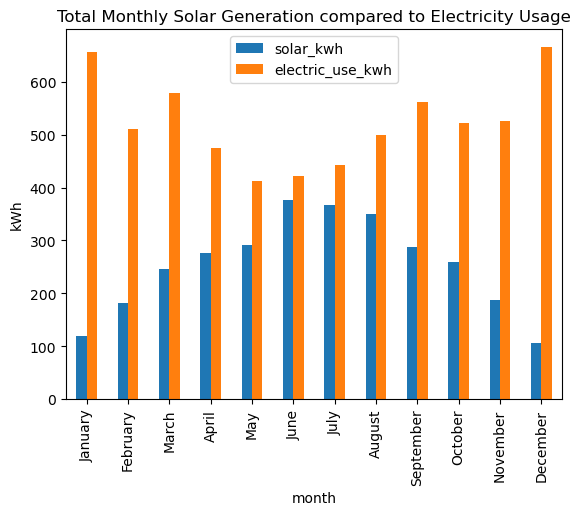

In [55]:
electricity_df_monthly2[['solar_kwh','electric_use_kwh']].plot(kind='bar')

plt.title("Total Monthly Solar Generation compared to Electricity Usage")
plt.ylabel('kWh')

plt.show()

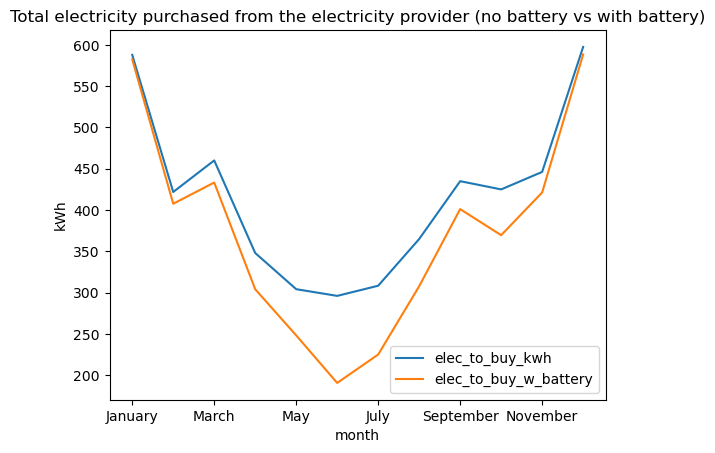

In [57]:
electricity_df_monthly2[['elec_to_buy_kwh','elec_to_buy_w_battery']].plot(kind='line')

plt.title("Total electricity purchased from the electricity provider (no battery vs with battery)")
plt.ylabel('kWh')

plt.show()